<a href="https://colab.research.google.com/github/jeffsimbolon/uploadFIle/blob/master/modelTester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
#How to specify GPU
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]="0" #change the number here
"""

'\n#How to specify GPU\nimport os\nos.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" \nos.environ["CUDA_VISIBLE_DEVICES"]="0" #change the number here\n'

In [0]:
import numpy as np
import tensorflow as tf
import keras
import PIL
#new one pip install pandas
import pandas as pd
import matplotlib.pyplot as plt

Import Data from drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!nohup unzip '/content/drive/My Drive/Coding/LabPresent/test.zip'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
nohup: ignoring input and appending output to 'nohup.out'


# New Section

# New Section

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam, SGD
from keras.models import Model
from keras.layers import Dense, Dropout, Conv2D, Flatten, Reshape, MaxPooling2D

In [0]:
# Create Network here
def create_model(input_shape, result_num):

    base_model = VGG16(include_top=False,
                       input_shape=input_shape,
                        weights = 'imagenet')
                       #classes = class_num) 
        
    x1 = base_model.output
    x2 = Flatten()(x1)
    x = Dense(4096, activation='relu')(x2)
    x = Dropout(0.25)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.25)(x)
    regression =Dense(result_num, activation='linear', kernel_initializer='zero')(x)
    model = Model(inputs=base_model.input, outputs=regression)
    
    opt=Adam(lr=0.00001)
    
    model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
    model.summary()
    return model
    

In [0]:

#def gen_alt():
#    train_generator=train_datagen.flow_from_dataframe(
#    dataframe=traindf,
#    directory="img",
#    class_mode = 'other',
#    x_col="image",
#    y_col=['x1','y1','x2','y2'],
#    seed=22,
#    shuffle=True,
#    target_size=(224,224),
#    batch_size=32)
#    while True:
#        data = train_generator.next()
#         data[1]=data[1]*2
#         yield [data[0],data[1]]

In [0]:
input_shape = (224,224,3)
result_num = 4

#traindf = pd.read_csv('test/test_labels.csv',dtype=str)
traindf = pd.read_csv('test/test_labels.csv')
train_datagen = ImageDataGenerator(
                rescale=1./224,
                validation_split=0.2
                #shear_range=0.2,
                #zoom_range=0.2,
                #horizontal_flip=True
                )

train_generator=train_datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="test",
    class_mode = 'raw',
    x_col="image",
    y_col=['x1','y1','x2','y2'],
    seed=22,
    shuffle=True,
    target_size=(224,224),
    batch_size=8,
    subset="training")

valid_generator=train_datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="test",
    class_mode = 'raw',
    x_col="image",
    y_col=['x1','y1','x2','y2'],
    seed=22,
    shuffle=True,
    target_size=(224,224),
    batch_size=8,
    subset="validation")

model = create_model(input_shape, result_num)

#X1i = train_generator.next()
#print(X1i[0][0], X1i[1][0])

Found 80 validated image filenames.
Found 20 validated image filenames.
58892288/58889256 [==============================] - 2s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)    

In [0]:
#print(valid_generator.class_indices)


In [0]:
!pip install livelossplot

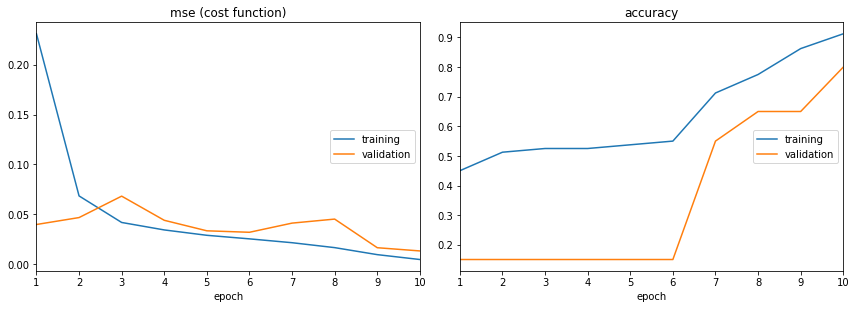

mse (cost function):
training   (min:    0.004, max:    0.231, cur:    0.004)
validation (min:    0.013, max:    0.068, cur:    0.013)

accuracy:
training   (min:    0.450, max:    0.913, cur:    0.913)
validation (min:    0.150, max:    0.800, cur:    0.800)


In [0]:
from livelossplot.keras import PlotLossesCallback
%matplotlib inline
#Start training
model.fit_generator(
        train_generator,
        steps_per_epoch=80/8, #image_numbers/batch_size
        epochs=10,
        validation_data=valid_generator,
        validation_steps = 20/8,
        callbacks=[PlotLossesCallback(skip_first=0)])

In [0]:
#Save model
model.save('/content/drive/My Drive/Coding/LabPresent/model_tester.h5')

In [0]:
#Save model
model.save('/content/model_tester.h5')

[0.6573308  0.50086445 0.81600463 0.6905771 ]
(147, 112)
(201, 170)


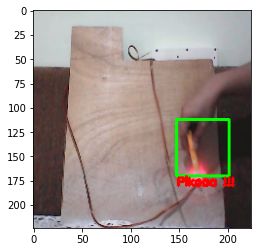

In [0]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

img = cv2.imread( "/content/drive/My Drive/Coding/LabPresent/test/080.png")
h,w = img.shape[:2]
w1 = int((w-h)/2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img[0:h,w1:(w-w1)]

small = cv2.resize(img,(224,224))
small = small /224
small = np.reshape(small,[1,224,224,3])

result = model.predict(small)[0]
print(result)

[ x1,y1,x2,y2 ] = result
point1 = (int(x1*w)+w1,int(y1*h))
point2 = (int(x2*w*1.1)+w1,int(y2*h*1.1))
#cv2.rectangle(imOut,(0,12),(15,34),(0,255,0),2)
print(point1)
print(point2)
cv2.rectangle(img,point1,point2,(0,255,0),2)
point4 = (point1[0],point2[1]+10) 
cv2.putText(img,'Pikaaa !!!',point4,0,0.4,(255,0,0),2)

plt.imshow(img)